In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
##drop unneccessary columns
df_index.drop(columns=['year','month','Unnamed: 0'],axis=1,inplace=True)



In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## always check for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
## visualize the data
import seaborn as sns

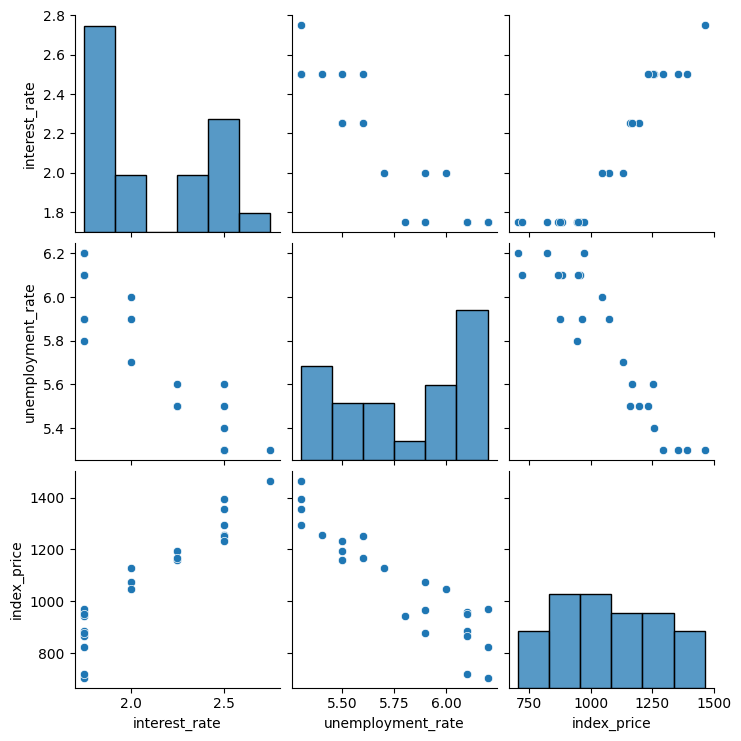

In [8]:
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

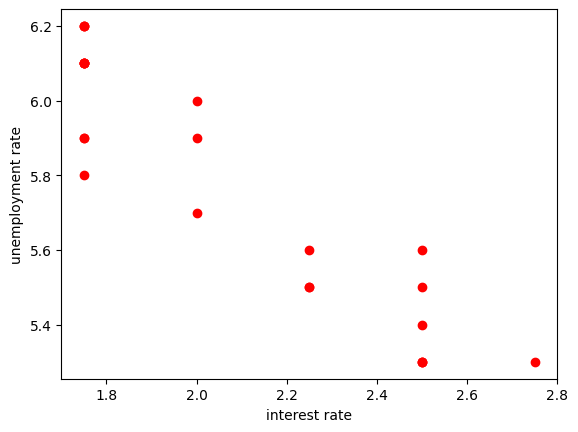

In [10]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [55]:
## get dependent and independent features
X=df_index.iloc[:,:-1]
Y=df_index['index_price']
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [12]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

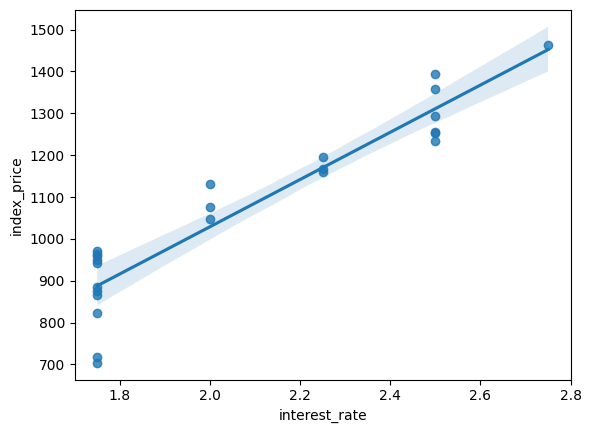

In [ ]:
## use x= and y= in regplot otherwise it will only take one value
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()

In [30]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [37]:
## cross val score
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regressor,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)


In [38]:
np.mean(validation_score)

np.float64(-5914.82818016239)

In [40]:
## prediction
y_pred=regressor.predict(X_test)

In [41]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [43]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [45]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


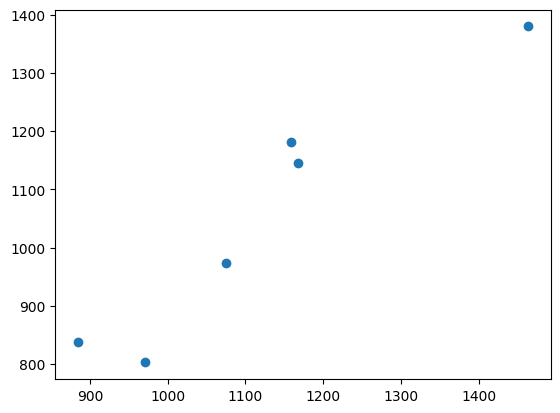

In [46]:
##assumption
plt.scatter(Y_test,y_pred)

In [47]:
residuals=Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


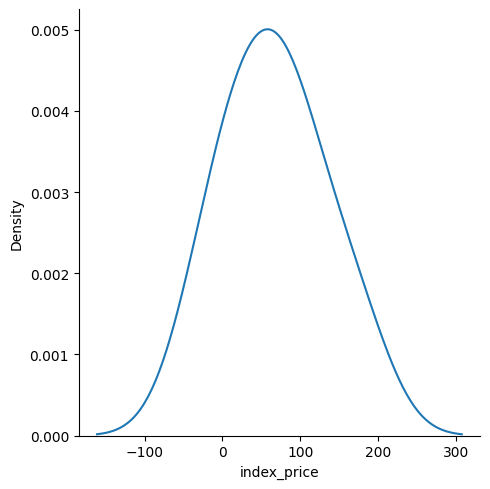

In [48]:
## Plot this residuals
sns.displot(residuals,kind='kde')

In [49]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 3.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.9/9.8 MB 3.6 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 3.5 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.8 MB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 3.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 3.7 MB/s eta 0:00:01
   -----------------------

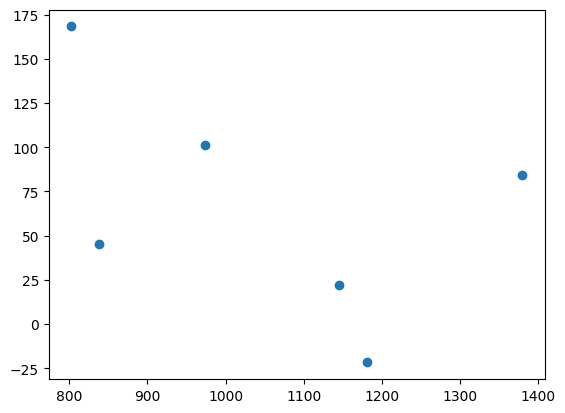

In [50]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [52]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()
model.summary()

g:\code\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 18 Jan 2025   Prob (F-statistic):                       0.754
Time:                        13:51:52   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print(regressor.coef_)

[  88.27275507 -116.25716066]
